In [1]:
import sys
import os
import json

from matplotlib import pyplot as plt

% matplotlib inline

In [2]:
# Constants
RESULTS_KEY_SENSITIVITY = "sensitivity"
RESULTS_KEY_SPECIFICITY = "specificity"
RESULTS_KEY_PRECISION = "precision"
RESULTS_KEY_FALSE_POSITIVE_RATE = "false_positive_rate"
RESULTS_KEY_TOTAL_EXPLORED = "total_explored"

RESULTS_KEY_METHOD_NAME = "method_name"
RESULTS_KEY_THRESHOLD = "threshold"
RESULTS_KEY_GRAPH_PATH = "graph_path"

# Result Processing Functions

In [234]:
def load_results(results_dir_path):
    results_fpaths = [os.path.join(results_dir_path, fpath) for fpath in os.listdir(results_dir_path) if fpath.endswith(".json")]

    results = {}

    for fpath in results_fpaths:
        with open(fpath, "r") as f:
            results_json = json.load(f)

        threshold = results_json[RESULTS_KEY_THRESHOLD]
        results[threshold] = results_json 
    return results

def parse_results(results):
    thresholds = sorted(results.keys())
    sensitivities = []
    specificities = []
    precisions = []
    fprs = []
    for threshold in thresholds:
        result = results[threshold]
        
        sensitivity = result[RESULTS_KEY_SENSITIVITY]
        specificity = result[RESULTS_KEY_SPECIFICITY]
        precision = result[RESULTS_KEY_PRECISION]
        fpr = result[RESULTS_KEY_FALSE_POSITIVE_RATE]

        sensitivities.append(sensitivity)
        specificities.append(specificity)
        precisions.append(precision)
        fprs.append(fpr)
        
    return thresholds, sensitivities, specificities, precisions, fprs

def plot_precision_sensitivity(results_dir, title, fig_savepath):
    results = load_results(results_dir)
    
    thresholds, sensitivities, specificities, precisions, fprs = parse_results(results)
    
    plt.plot(thresholds, sensitivities, label="sensitivity (true positive rate)", color="red")
    plt.scatter(thresholds, sensitivities, color="red")
    plt.plot(thresholds, precisions, label="precision", color="blue")
    plt.scatter(thresholds, precisions, color="blue")
    plt.xlabel("Positive threshold", fontsize=16)
    plt.ylabel("Sensitivity", fontsize=16)
    plt.legend()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.twinx()
    plt.ylabel("Precision", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.suptitle(title, fontsize=16, y=1.05)
    
    plt.tight_layout(pad=0.3)
    plt.savefig(fig_savepath, pad_inches=0.3, bbox_inches="tight")
    
def plot_specificity_fpr(results_dir, title, fig_savepath):
    results = load_results(results_dir)
    
    thresholds, sensitivities, specificities, precisions, fprs = parse_results(results)
    
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.plot(thresholds, specificities, label="specificity", color="red")
    plt.scatter(thresholds, specificities, color="red")
    plt.plot(thresholds, fprs, label="false positive rate", color="blue")
    plt.scatter(thresholds, fprs, color="blue")
    plt.xlabel("Positive threshold", fontsize=16)
    plt.ylabel("Specificity", fontsize=16)
    plt.legend()   
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.twinx()
    plt.ylabel("False Positive Rate", fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.suptitle(title, fontsize=16, y=1.05)
    
    plt.tight_layout(pad=0.3)
    plt.savefig(fig_savepath, pad_inches=0.3, bbox_inches="tight")

# Small Dataset

## Jaccard Coefficients

In [249]:
jaccard_results_dir = "results_fb_small/jaccard"

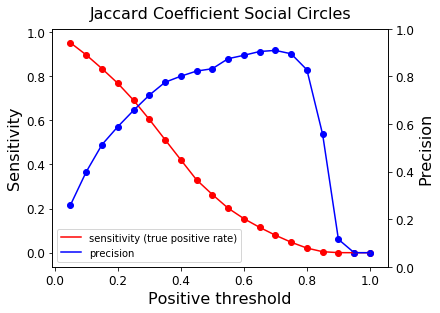

In [250]:
plot_precision_sensitivity(jaccard_results_dir, "Jaccard Coefficient Social Circles", "jaccard_small_sens_prec.png")

In [251]:
jaccard_results = load_results(jaccard_results_dir)
thresholds, sensitivities, _, precisions, _ = parse_results(jaccard_results)

print(thresholds[4])
print(sensitivities[4])
print(precisions[4])
print("------")
print(thresholds[3])
print(sensitivities[3])
print(precisions[3])

0.25
0.690652129565
0.644236766711
------
0.2
0.767107917583
0.570420873435


### Observation: Two strong methods seems to be the use of the Jaccard Coefficient with positive thresholds of .25, .2

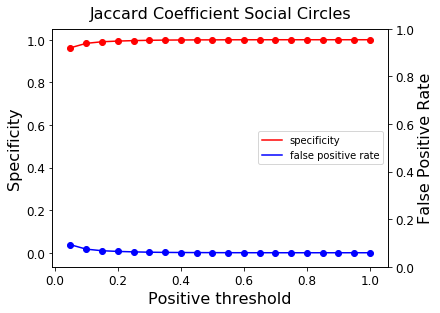

In [252]:
plot_specificity_fpr(jaccard_results_dir, "Jaccard Coefficient Social Circles", "jaccard_small_spec_fpr.png")

## Common Neighbors

In [253]:
cn_results_dir = "results_fb_small/common_neighbors"

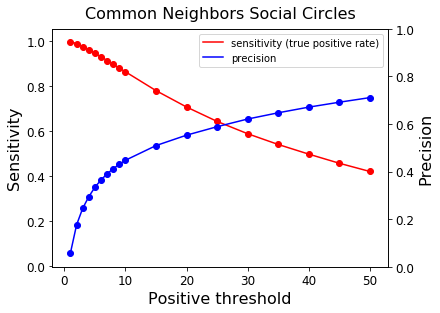

In [254]:
plot_precision_sensitivity(cn_results_dir, "Common Neighbors Social Circles", "cn_small_sens_prec.png")

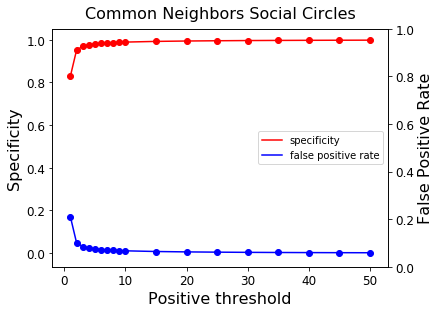

In [255]:
plot_specificity_fpr(cn_results_dir, "Common Neighbors Social Circles", "cn_small_spec_fpr.png")

## Preferential Attachment

In [256]:
pa_results_dir = "results_fb_small/pref_attach"

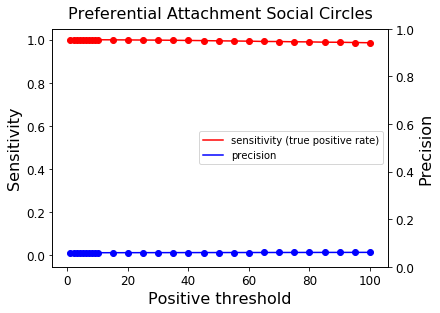

In [257]:
plot_precision_sensitivity(pa_results_dir, "Preferential Attachment Social Circles", "pa_small_sens_prec.png")

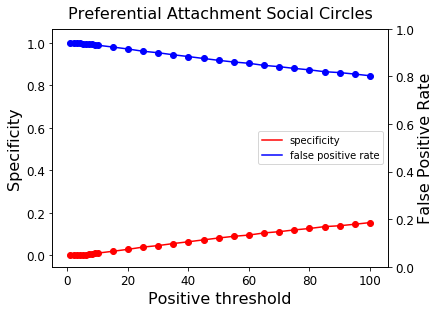

In [258]:
plot_specificity_fpr(pa_results_dir, "Preferential Attachment Social Circles", "pa_small_spec_fpr.png")

# Large Dataset

## Jaccard

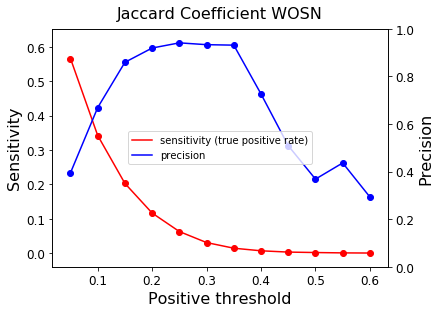

In [259]:
jaccard_results_dir_large = "results_fb_large/jaccard"
plot_precision_sensitivity(jaccard_results_dir_large, "Jaccard Coefficient WOSN", "jaccard_large_sens_prec.png")

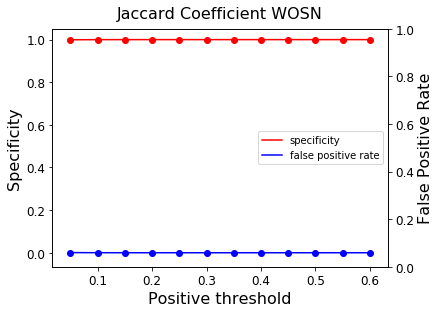

In [260]:
plot_specificity_fpr(jaccard_results_dir_large, "Jaccard Coefficient WOSN", "jaccard_large_spec_fpr.png")

## Common Neighbors

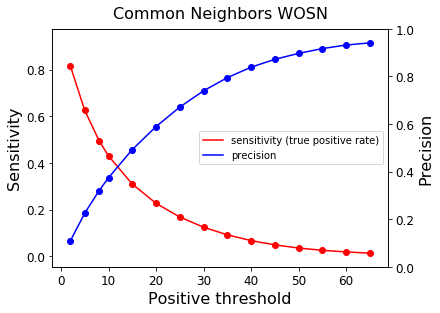

In [261]:
cn_results_dir_large = "results_fb_large/common_neighbors"
plot_precision_sensitivity(cn_results_dir_large, "Common Neighbors WOSN", "cn_large_sens_prec.png")

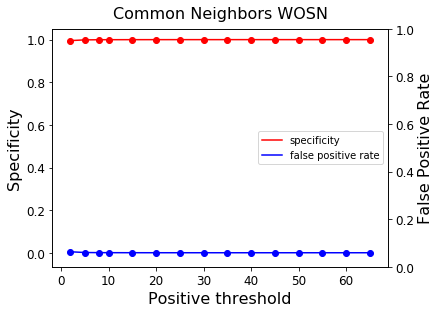

In [262]:
plot_specificity_fpr(cn_results_dir_large, "Common Neighbors WOSN", "cn_large_spec_fpr.png")